# 아파트 실거래가 예측

**배경**  

통계청 2015년 자료에 의하면 (https://bit.ly/2SFyzMA)  
일반적인 한국인의 절반은 48.1%는 아파트에 살고 있습니다.  
그들은 아파트 주거 선호도가 매우 높습니다.  
또한 부의 증식 수단으로 생각 하기 때문에 아파트 가격에 관심이 많습니다.  

이번 대회의 데이터 제공자는 직방입니다.  
직방은 부동산 정보의 비대칭성과 불투명성을 해소하기 위해 노력하며,  
중개사와 구매자를 연결하여 부동산정보 서비스 시장의 신뢰도를 높이는데 기여합니다.  

최근 매물 가격 정보는 직방, 다음부동산, 네이버부동산에서 볼 수 있습니다.  
하지만 최근 매물 가격은 아직 거래되지 않아 정확하지 않은 정보일 수 있습니다.

이에따라, 본 대회는 실 거래가와 아파트, 학교, 지하철역 정보를 제공하며,  
아파트 구매자들의 비대칭성 정보를 해결하기 위해 미래의 실 거래가 예측을 목표로 합니다.
</br></br>

**목적** 

서울/부산 지역 아파트 실 거래가를 예측하는 모델 개발
</br></br>

**데이터셋**
- 데이터셋 정보   
약1,600,000여개의 실거래 데이터, 아파트 거래일, 지역, 전용면적, 공급면적 등의 정보가 제공됩니다.  
* 국토교통부 실거래가 공개시스템 (http://rt.molit.go.kr/)과 같은 법적인 제약이 없는 외부 데이터(공공 데이터) 사용이 가능합니다.  

- 데이터 파일
1. train.csv/test.csv : 서울/부산 지역의 1,100,000여개 거래 데이터, 아파트 거래일, 지역, 전용면적, 실 거래가 등의 정보 / 실 거래가를 제외하고 train.csv와 동일
    - apartment_d - 아파트 아이디
    - city - 도시
    - dong - 동
    - jibun - 지번
    - apt - 아파트 단지 이름
    - addr_kr - 주소
    - exclusive_use_area - 전용면적
    - year_of_completion - 설립일자
    - transaction_year_month - 거래년월
    - transaction_date - 거래날짜
    - floor - 층
    - transaction_real_price - 실거래가(train만 존재)

2. park.csv : 서울/부산 지역의 공원에 대한 정보
    - city - 도시
    - gu - 구
    - dong - 동
    - park_name - 공원이름
    - park_type - 공원 종류
    - park_area - 공원의 넓이
    - park_exercise_facility - 공원보유 운동시설
    - park_entertainment_facility - 공원보유 유희시설
    - park_benefit_facility - 공원보유 편익시설
    - park_cultural_tacitiy - 공원보유 교양시설
    - park facility-other - 공원보유 기타시설
    - park_open_year - 공원 개장년도
    - reference_date - 데이터 기준일자(해당 데이터가 기록된 일자)

3. day_care_center.csv : 서울/부산 지역의 어린이집에 대한 정보
    - city - 도시
    - gu - 구
    - day_care_name - 어린이집 이름
    - day-care_type - 어린이집 종류
    - day_care_baby_num - 정원수
    - teacher_num - 보육교직원수
    - nursing_room_num - 보육실수
    - playground_num - 놀이터수
    - CCTV_num - CCTV 설치수
    - is_commuting-vehicle - 통학차량 운영여부
    - reference_date - 데이터 기준일자(해당 데이터가 기록된 일자)

## 데이터 불러오기 및 기본 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # macOS 기본 한글 폰트

### 데이터 불러오기

#### train data

In [2]:
train = pd.read_csv('train.csv')
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [3]:
train.tail()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
1216548,1234823,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,59.8245,2012,201711,11~20,3,22000
1216549,1234824,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,7,30750
1216550,1234825,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,9,29500
1216551,1234826,9586,부산광역시,정관읍 용수리,1364,정관신도시롯데캐슬,정관읍 용수리 1364 정관신도시롯데캐슬,101.7400,2008,201711,21~30,7,26700
1216552,1234827,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,16,28800


In [4]:
train['transaction_year_month'].unique()

array([200801, 200802, 200803, 200804, 200805, 200806, 200807, 200808,
       200809, 200810, 200811, 200812, 200901, 200902, 200903, 200904,
       200905, 200906, 200907, 200908, 200909, 200910, 200911, 200912,
       201001, 201002, 201003, 201004, 201005, 201006, 201007, 201008,
       201009, 201010, 201011, 201012, 201101, 201102, 201103, 201104,
       201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112,
       201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208,
       201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304,
       201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312,
       201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408,
       201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504,
       201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
       201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
       201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
      

#### test data

In [5]:
test = pd.read_csv('test.csv')
test.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21


In [6]:
test.tail()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
5458,1174640,8965,서울특별시,양재동,15-9,위너스,양재동 15-9 위너스,84.050,2003,201710,11~20,7
5459,1175575,3831,서울특별시,반포동,18-1,래미안퍼스티지,반포동 18-1 래미안퍼스티지,84.930,2009,201712,1~10,4
5460,1157024,5550,서울특별시,구로동,256-1,삼성래미안,구로동 256-1 삼성래미안,110.188,2004,201712,21~31,23
5461,1136863,3371,서울특별시,홍제동,24-16,동양드림,홍제동 24-16 동양드림,92.440,2005,201710,21~31,1
5462,1218921,6825,부산광역시,재송동,1187,센텀그린타워,재송동 1187 센텀그린타워,84.640,1993,201712,1~10,7


In [7]:
test['transaction_year_month'].unique()

array([201711, 201708, 201710, 201707, 201712, 201706, 201702, 201704,
       201705, 201703, 201701, 201709])

### 데이터 구조 파악

#### train

##### 데이터 정보

In [8]:
train.shape

(1216553, 13)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

##### 변수 탐색

- 범주형 데이터

In [10]:
train.select_dtypes(include='object')

,city,dong,jibun,apt,addr_kr,transaction_date
0,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),21~31
1,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,1~10
2,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,1~10
3,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,11~20
4,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,21~31
...,...,...,...,...,...,...
1216548,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,11~20
1216549,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,21~30
1216550,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,21~30
1216551,부산광역시,정관읍 용수리,1364,정관신도시롯데캐슬,정관읍 용수리 1364 정관신도시롯데캐슬,21~30


In [11]:
train['city'].value_counts()

city
서울특별시    742285
부산광역시    474268
Name: count, dtype: int64

<Axes: xlabel='city', ylabel='Count'>

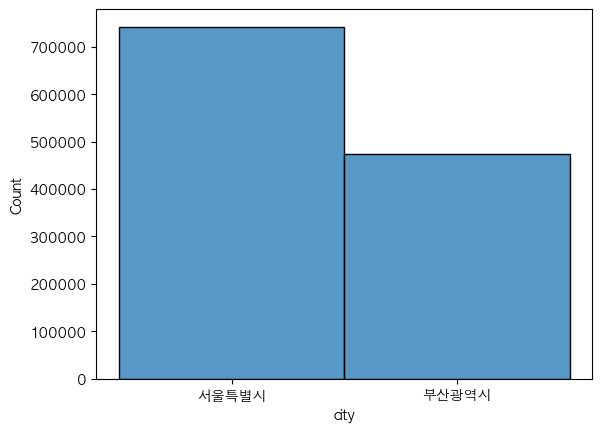

In [12]:
sns.histplot(data=train, x='city')

In [13]:
train['dong'].value_counts()[:10]

dong
상계동    29346
좌동     23255
화명동    21511
용호동    17398
중계동    17079
신정동    16902
연산동    16365
다대동    15586
창동     15474
구로동    14372
Name: count, dtype: int64

In [14]:
train['jibun'].value_counts()[:10]

jibun
176-30    6594
17        3709
944       3615
53        3566
479       3435
10        3380
13        3070
347       2996
105       2961
1550      2940
Name: count, dtype: int64

- 수치형 데이터

In [15]:
train.select_dtypes(include='number')

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
0,0,7622,84.8200,2002,200801,2,37500
1,1,5399,99.1700,1973,200801,6,20000
2,2,3578,84.7400,2007,200801,6,38500
3,3,10957,146.3900,2003,200801,15,118000
4,4,10639,194.4300,2004,200801,3,120000
...,...,...,...,...,...,...,...
1216548,1234823,9578,59.8245,2012,201711,3,22000
1216549,1234824,9578,84.9923,2012,201711,7,30750
1216550,1234825,9578,84.9923,2012,201711,9,29500
1216551,1234826,9586,101.7400,2008,201711,7,26700


In [16]:
train['year_of_completion'].value_counts()

year_of_completion
2004    71809
2003    62520
2005    61832
1999    58578
1996    56892
2006    49669
2002    49142
1988    48215
1998    47765
1997    47108
2000    46116
2001    44627
2008    41203
1993    39943
1992    38863
1995    37201
2007    34989
1994    32455
1989    27149
2009    23890
2011    22032
1991    21365
2010    21070
1986    20209
2012    18877
1987    18160
1983    16551
2013    15743
2014    15359
1990    15158
1984    14357
1982    12826
1985    12798
1980    12488
1979     9666
1981     9233
1978     9038
2015     8357
2016     4873
1977     3468
1976     3044
1975     2930
1974     2430
2017     1967
1971     1675
1969      603
1970      580
1973      529
1972      494
1962      427
1968      183
1966       42
1961       22
1967       20
1965       13
Name: count, dtype: int64

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_35889/1607185288.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '1961'),
 Text(1, 0, '1962'),
 Text(2, 0, '1965'),
 Text(3, 0, '1966'),
 Text(4, 0, '1967'),
 Text(5, 0, '1968'),
 Text(6, 0, '1969'),
 Text(7, 0, '1970'),
 Text(8, 0, '1971'),
 Text(9, 0, '1972'),
 Text(10, 0, '1973'),
 Text(11, 0, '1974'),
 Text(12, 0, '1975'),
 Text(13, 0, '1976'),
 Text(14, 0, '1977'),
 Text(15, 0, '1978'),
 Text(16, 0, '1979'),
 Text(17, 0, '1980'),
 Text(18, 0, '1981'),
 Text(19, 0, '1982'),
 Text(20, 0, '1983'),
 Text(21, 0, '1984'),
 Text(22, 0, '1985'),
 Text(23, 0, '1986'),
 Text(24, 0, '1987'),
 Text(25, 0, '1988'),
 Text(26, 0, '1989'),
 Text(27, 0, '1990'),
 Text(28, 0, '1991'),
 Text(29, 0, '1992'),
 Text(30, 0, '1993'),
 Text(31, 0, '1994'),
 Text(32, 0, '1995'),
 Text(33, 0, '1996'),
 Text(34, 0, '1997'),
 Text(35, 0, '1998'),
 Text(36, 0, '1999'),
 Text(37, 0, '2000'),
 Text(38, 0, '2001'),
 Text(39, 0, '2002'),
 Text(40, 0, '2003'),
 Text(41, 0, '2004'),
 Text(42, 0, '2005'),
 Text(43, 0, '2006'),
 Text(44, 0, '2007'),
 Text(45, 0, '2008')

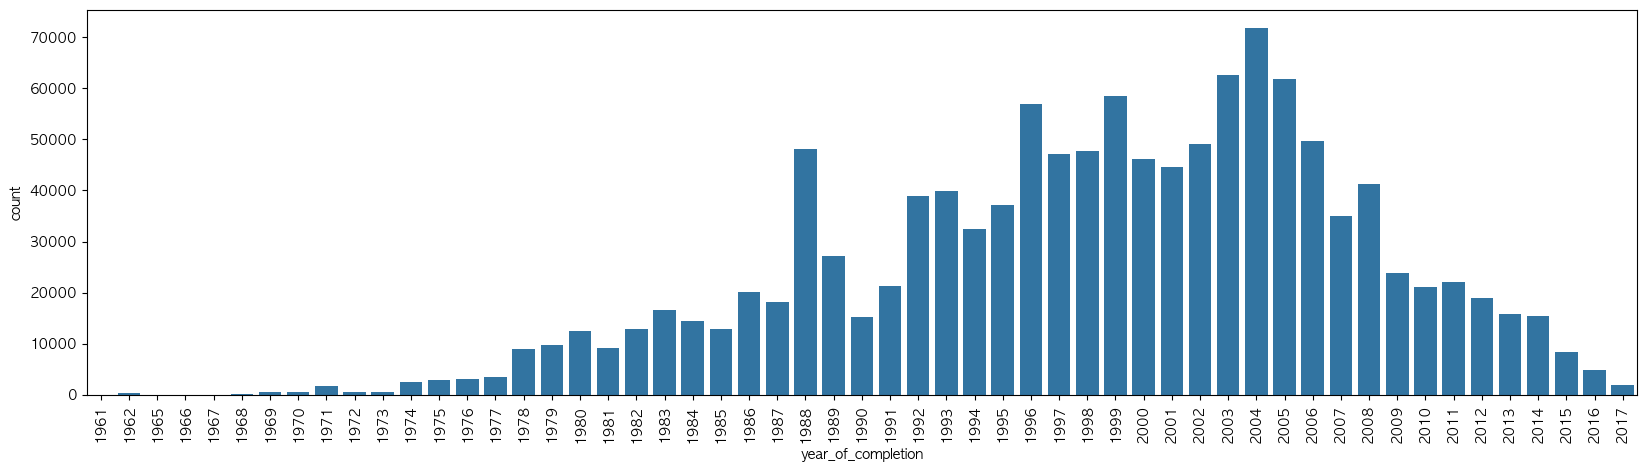

In [17]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data=train, x='year_of_completion')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [18]:
train['transaction_year_month'].value_counts()

transaction_year_month
201503    22444
201610    19072
201606    18296
201705    18080
201504    17970
          ...  
201201     4351
201207     4003
201208     3920
200811     3433
200812     3400
Name: count, Length: 119, dtype: int64

/var/folders/zw/1zmd_ykn3zbd2m00vrvhv5m40000gn/T/ipykernel_35889/2003307061.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '200801'),
 Text(1, 0, '200802'),
 Text(2, 0, '200803'),
 Text(3, 0, '200804'),
 Text(4, 0, '200805'),
 Text(5, 0, '200806'),
 Text(6, 0, '200807'),
 Text(7, 0, '200808'),
 Text(8, 0, '200809'),
 Text(9, 0, '200810'),
 Text(10, 0, '200811'),
 Text(11, 0, '200812'),
 Text(12, 0, '200901'),
 Text(13, 0, '200902'),
 Text(14, 0, '200903'),
 Text(15, 0, '200904'),
 Text(16, 0, '200905'),
 Text(17, 0, '200906'),
 Text(18, 0, '200907'),
 Text(19, 0, '200908'),
 Text(20, 0, '200909'),
 Text(21, 0, '200910'),
 Text(22, 0, '200911'),
 Text(23, 0, '200912'),
 Text(24, 0, '201001'),
 Text(25, 0, '201002'),
 Text(26, 0, '201003'),
 Text(27, 0, '201004'),
 Text(28, 0, '201005'),
 Text(29, 0, '201006'),
 Text(30, 0, '201007'),
 Text(31, 0, '201008'),
 Text(32, 0, '201009'),
 Text(33, 0, '201010'),
 Text(34, 0, '201011'),
 Text(35, 0, '201012'),
 Text(36, 0, '201101'),
 Text(37, 0, '201102'),
 Text(38, 0, '201103'),
 Text(39, 0, '201104'),
 Text(40, 0, '201105'),
 Text(41, 0, '201106'),
 T

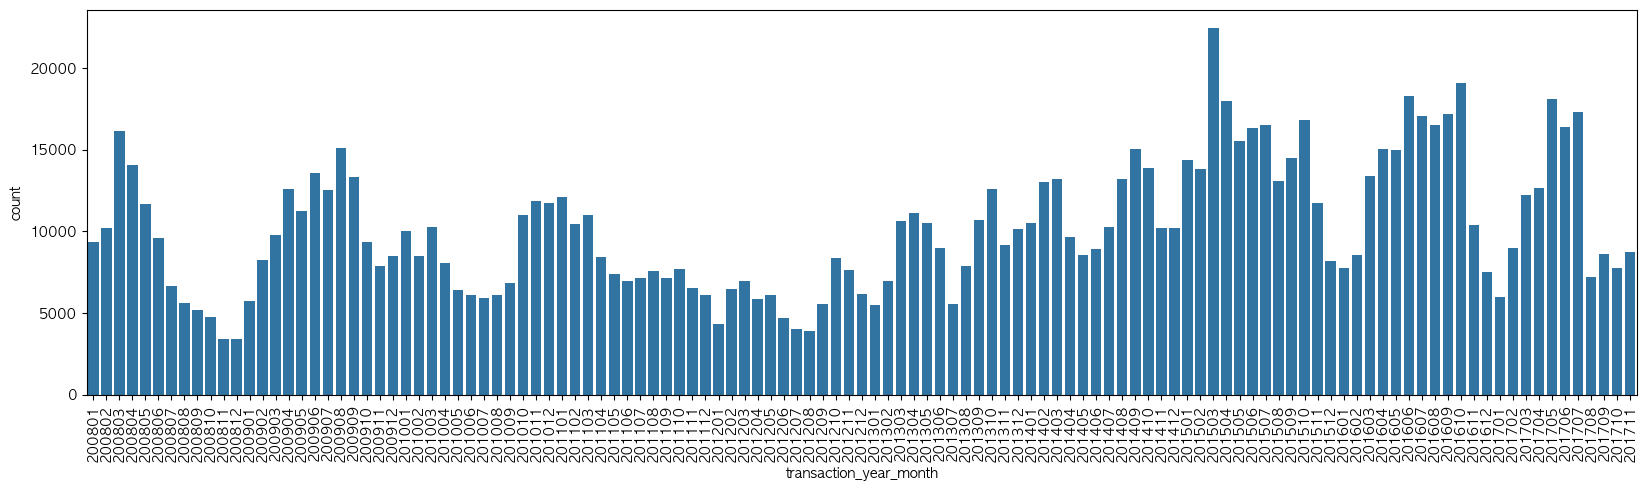

In [19]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data=train, x='transaction_year_month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#### test

##### 데이터 정보

In [20]:
test.shape

(5463, 12)

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


##### 변수 탐색

- 범주형 데이터

In [22]:
test.select_dtypes(include='object')

,city,dong,jibun,apt,addr_kr,transaction_date
0,서울특별시,목동,938,청학,목동 938 청학,11~20
1,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,21~31
2,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,11~20
3,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),1~10
4,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,11~20
...,...,...,...,...,...,...
5458,서울특별시,양재동,15-9,위너스,양재동 15-9 위너스,11~20
5459,서울특별시,반포동,18-1,래미안퍼스티지,반포동 18-1 래미안퍼스티지,1~10
5460,서울특별시,구로동,256-1,삼성래미안,구로동 256-1 삼성래미안,21~31
5461,서울특별시,홍제동,24-16,동양드림,홍제동 24-16 동양드림,21~31


In [23]:
test['city'].value_counts()

city
서울특별시    3911
부산광역시    1552
Name: count, dtype: int64

<Axes: xlabel='city', ylabel='Count'>

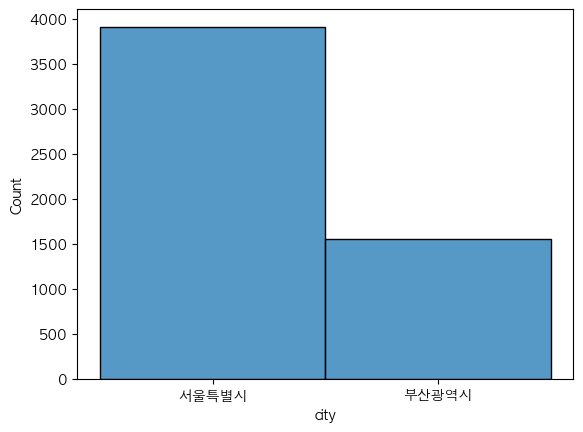

In [24]:
sns.histplot(data=test, x='city')

In [25]:
test['dong'].value_counts()

dong
구로동      106
화곡동      102
상계동       90
신정동       83
서초동       81
        ... 
대청동1가      1
범전동        1
신영동        1
충무동1가      1
안암동3가      1
Name: count, Length: 390, dtype: int64

- 수치형 데이터

In [26]:
test.select_dtypes(include='number')

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor
0,1145756,10453,35.5500,2002,201711,2
1,1198704,989,68.7200,1977,201708,2
2,1222384,8597,72.5400,1989,201710,2
3,1179897,11086,111.5400,2004,201707,10
4,1223091,2121,119.6398,2014,201712,21
...,...,...,...,...,...,...
5458,1174640,8965,84.0500,2003,201710,7
5459,1175575,3831,84.9300,2009,201712,4
5460,1157024,5550,110.1880,2004,201712,23
5461,1136863,3371,92.4400,2005,201710,1


## 데이터 전처리

### train

#### 결측치 처리

In [27]:
train.isna().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

#### 이상치 처리

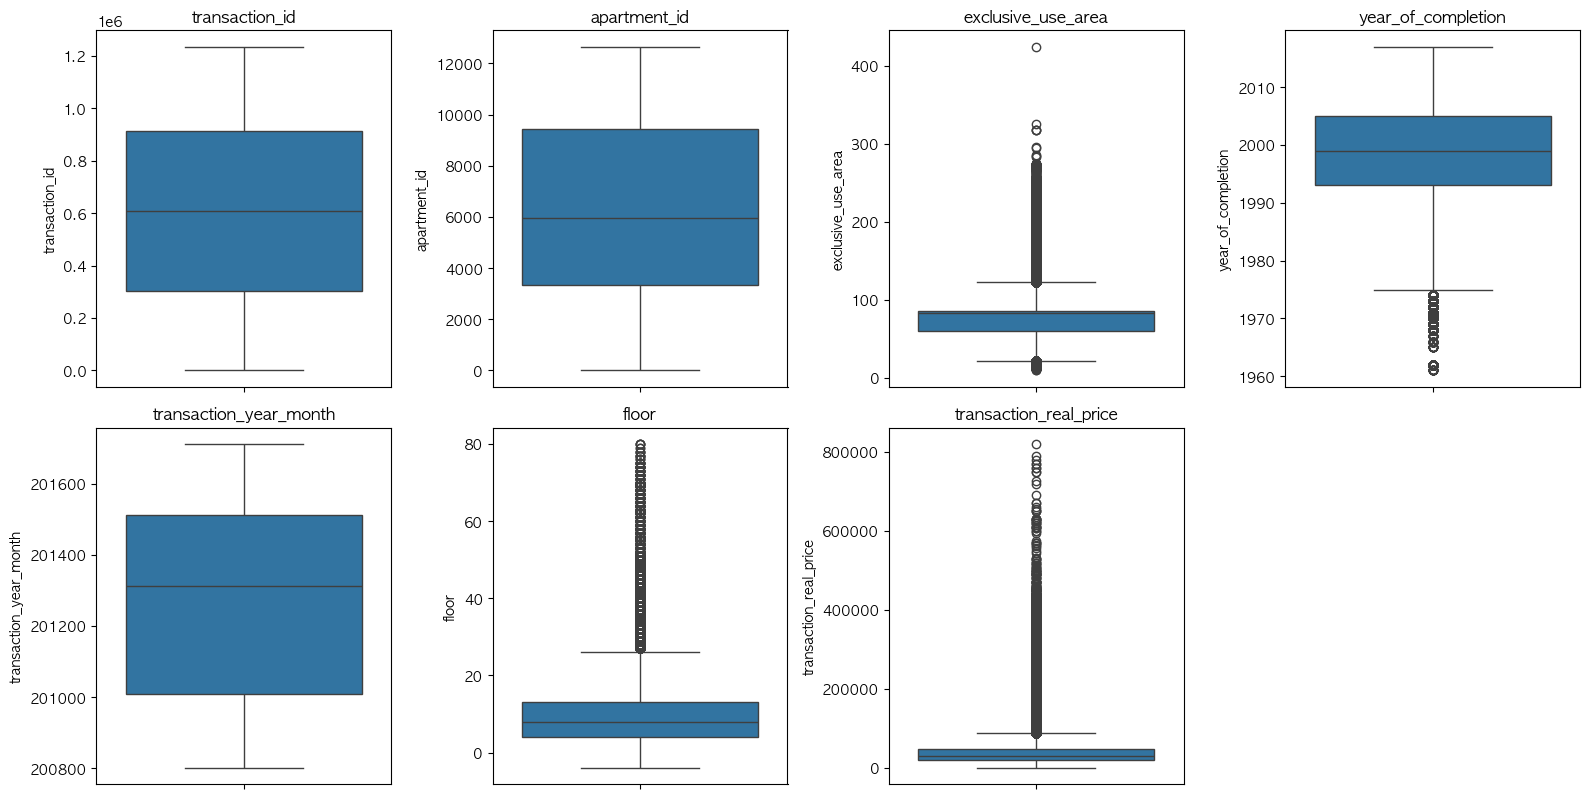

In [28]:
# 숫자 컬럼만 선택
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()

# 서브블롯의 행을 계산
num_cols = len(numerical_cols)
num_rows = num_cols // 4
num_rows += num_cols % 4

position = range(1, num_cols + 1)

fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
for k, col in zip(position, numerical_cols):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.boxplot(train[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

<Axes: xlabel='exclusive_use_area'>

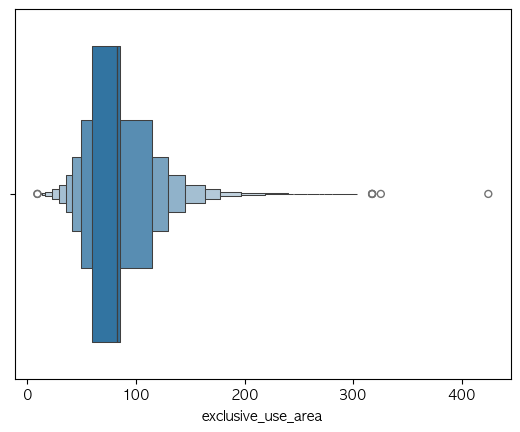

In [29]:
sns.boxenplot(data=train, x='exclusive_use_area')

#### 서울 / 부산 데이터 나누기

In [30]:
train['city'].value_counts()

city
서울특별시    742285
부산광역시    474268
Name: count, dtype: int64

In [31]:
seoul_train = train[train['city'] == '서울특별시']
busan_train = train[train['city'] == '부산광역시']

### test

#### 결측치 처리

In [32]:
test.isna().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
dtype: int64

#### 이상치 처리

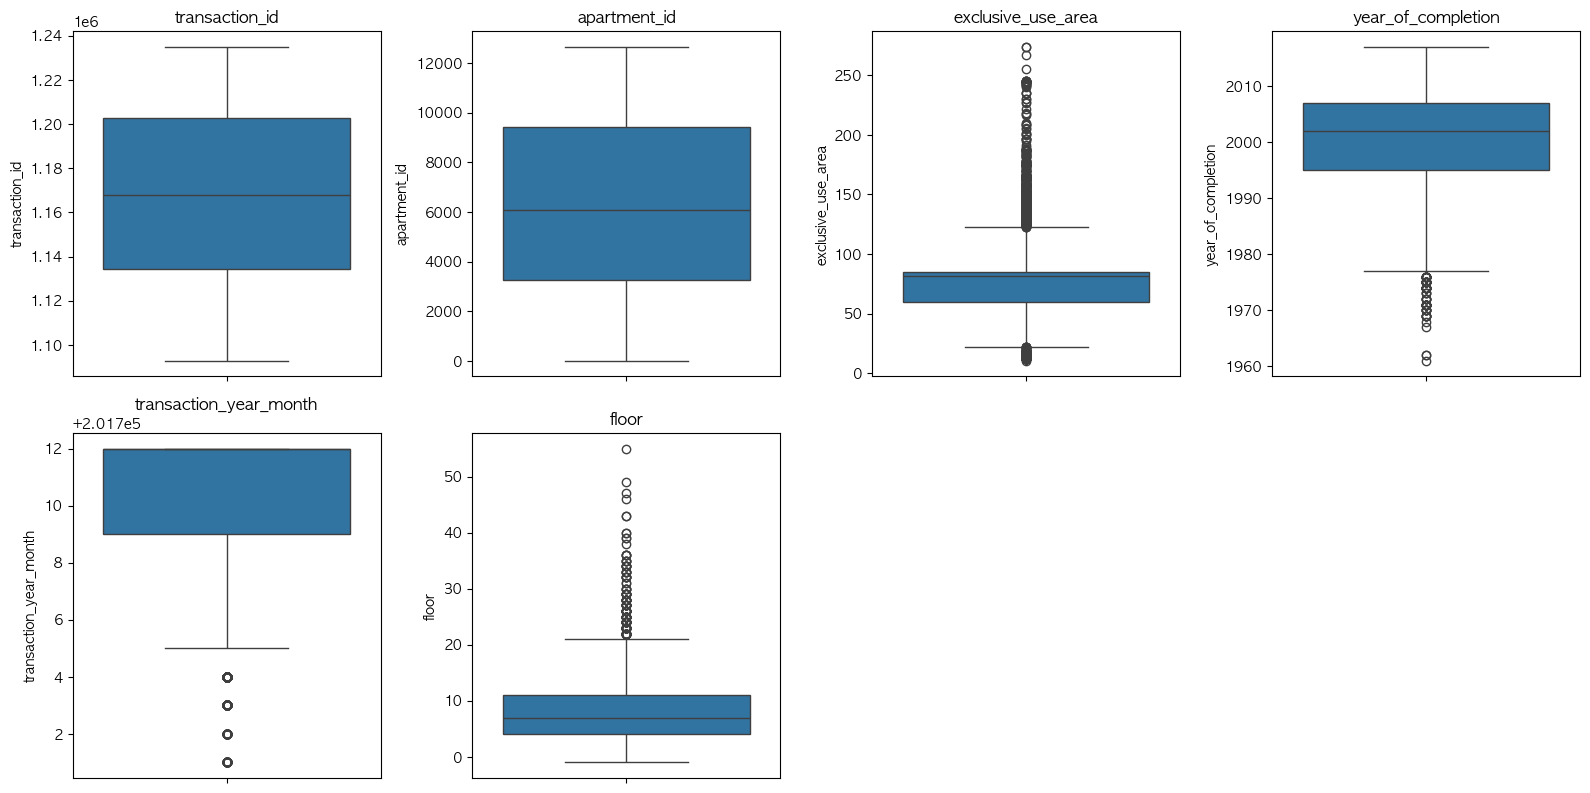

In [33]:
# 숫자 컬럼만 선택
numerical_cols = test.select_dtypes(include=[np.number]).columns.tolist()

# 서브블롯의 행을 계산
num_cols = len(numerical_cols)
num_rows = num_cols // 4
num_rows += num_cols % 4

position = range(1, num_cols + 1)

fig = plt.figure(figsize=(16, num_rows * 4))

#서브플롯으로 boxplot 그리기
for k, col in zip(position, numerical_cols):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.boxplot(test[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

<Axes: xlabel='exclusive_use_area'>

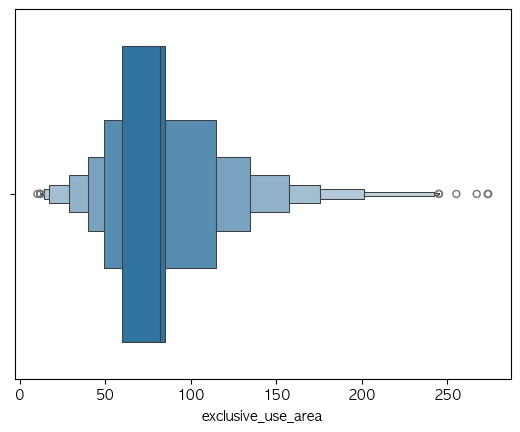

In [34]:
sns.boxenplot(data=test, x='exclusive_use_area')

### feature

다른 feature에 대해서는 feature_engineer.ipynb 에 있습니다.   

test 셋에 null 값을 지오코딩하고, 자잘한 전처리 후 train_processed.csv, test_processed.csv 파일로 정리했습니다.

In [35]:
train_processed = pd.read_csv('train_processed.csv')
test_processed = pd.read_csv('test_processed.csv')

#### train_processed

In [36]:
train_processed.head()

,transaction_id,apartment_id_x,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,...,floor,transaction_real_price,address,lat,long,park_min,kind_min,subway_min,elem_min,adjusted_year_of_completion
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,...,2,37500,서울특별시 신교동 6-13,37.584160,126.967230,0.831168,0.295177,1.086383,0.266380,41
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,...,6,20000,서울특별시 필운동 142,37.577363,126.969097,0.213923,0.089404,0.429346,0.211640,12
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,...,6,38500,서울특별시 필운동 174-1,37.577363,126.969097,0.213923,0.089404,0.429346,0.211640,46
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,...,15,118000,서울특별시 내수동 95,37.572940,126.971800,0.365575,0.102862,0.348871,0.566101,42
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,...,3,120000,서울특별시 내수동 110-15,37.572940,126.971800,0.365575,0.102862,0.348871,0.566101,43


In [37]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742285 entries, 0 to 742284
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   transaction_id               742285 non-null  int64  
 1   apartment_id_x               742285 non-null  int64  
 2   city                         742285 non-null  object 
 3   dong                         742285 non-null  object 
 4   jibun                        742285 non-null  object 
 5   apt                          742285 non-null  object 
 6   addr_kr                      742285 non-null  object 
 7   exclusive_use_area           742285 non-null  float64
 8   year_of_completion           742285 non-null  int64  
 9   transaction_year_month       742285 non-null  int64  
 10  transaction_date             742285 non-null  object 
 11  floor                        742285 non-null  int64  
 12  transaction_real_price       742285 non-null  int64  
 13 

##### 요약 통계량

In [38]:
train_processed.describe()

,transaction_id,apartment_id_x,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,lat,long,park_min,kind_min,subway_min,elem_min,adjusted_year_of_completion
count,7.422850e+05,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000
mean,4.262599e+05,6443.204074,77.906753,1998.056237,201327.614206,8.809247,49169.779317,37.555029,127.001507,1.020257,0.168869,0.589706,0.388115,37.056237
std,3.216569e+05,3542.337499,28.691683,8.995775,289.810480,5.919972,33868.323394,0.056749,0.088986,0.596747,0.119353,0.321318,0.222857,8.995775
min,0.000000e+00,0.000000,11.955900,1961.000000,200801.000000,1.000000,350.000000,37.445050,126.793126,0.034662,0.009886,0.002982,0.010148,0.000000
25%,1.855710e+05,3668.000000,59.740000,1992.000000,201102.000000,4.000000,29000.000000,37.505560,126.929161,0.568007,0.090204,0.367921,0.227960,31.000000
50%,3.711420e+05,6149.000000,83.160000,1999.000000,201405.000000,8.000000,40000.000000,37.543636,127.020195,0.937452,0.150836,0.533489,0.351831,38.000000
75%,5.567130e+05,9610.000000,84.960000,2004.000000,201603.000000,12.000000,58000.000000,37.597420,127.072420,1.399623,0.217295,0.716140,0.527155,43.000000
max,1.196849e+06,12658.000000,424.320000,2017.000000,201711.000000,69.000000,820000.000000,37.682606,127.171300,3.103618,1.015216,3.196721,1.688865,56.000000


- exclusive_use_area

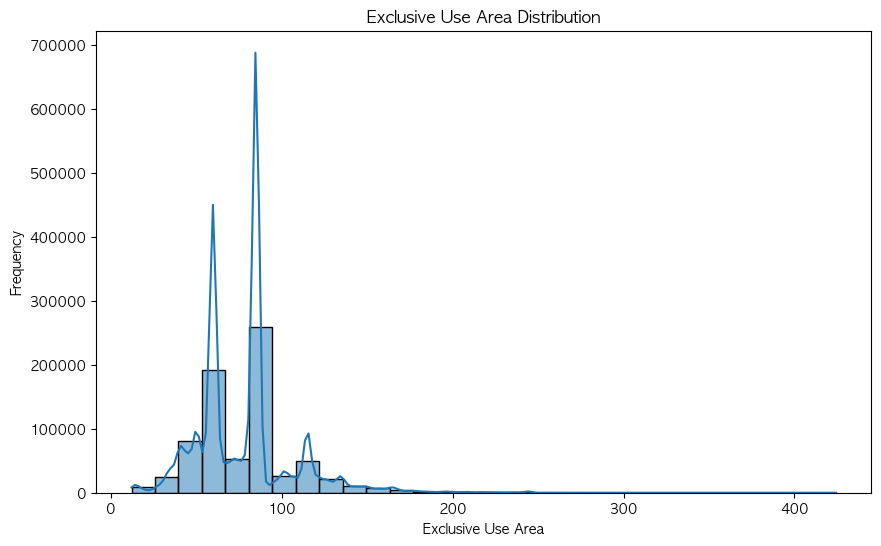

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(train_processed['exclusive_use_area'], bins=30, kde=True)
plt.title('Exclusive Use Area Distribution')
plt.xlabel('Exclusive Use Area')
plt.ylabel('Frequency')
plt.show()

- transaction_real_price

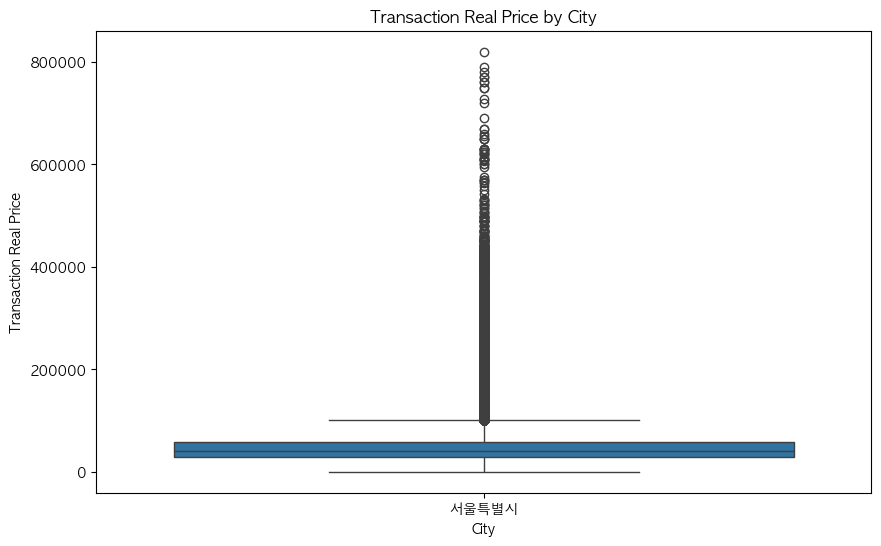

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='transaction_real_price', data=train_processed)
plt.title('Transaction Real Price by City')
plt.xlabel('City')
plt.ylabel('Transaction Real Price')
plt.show()

- year_of_completion

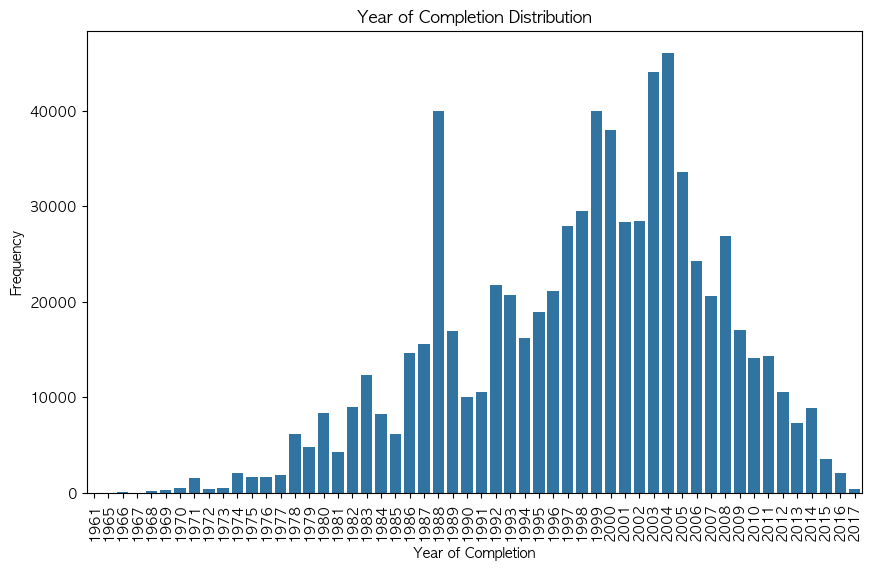

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year_of_completion', data=train_processed)
plt.title('Year of Completion Distribution')
plt.xlabel('Year of Completion')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

- pairplot

In [42]:
train_processed.columns

Index(['transaction_id', 'apartment_id_x', 'city', 'dong', 'jibun', 'apt',
       'addr_kr', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor',
       'transaction_real_price', 'address', 'lat', 'long', 'park_min',
       'kind_min', 'subway_min', 'elem_min', 'adjusted_year_of_completion'],
      dtype='object')

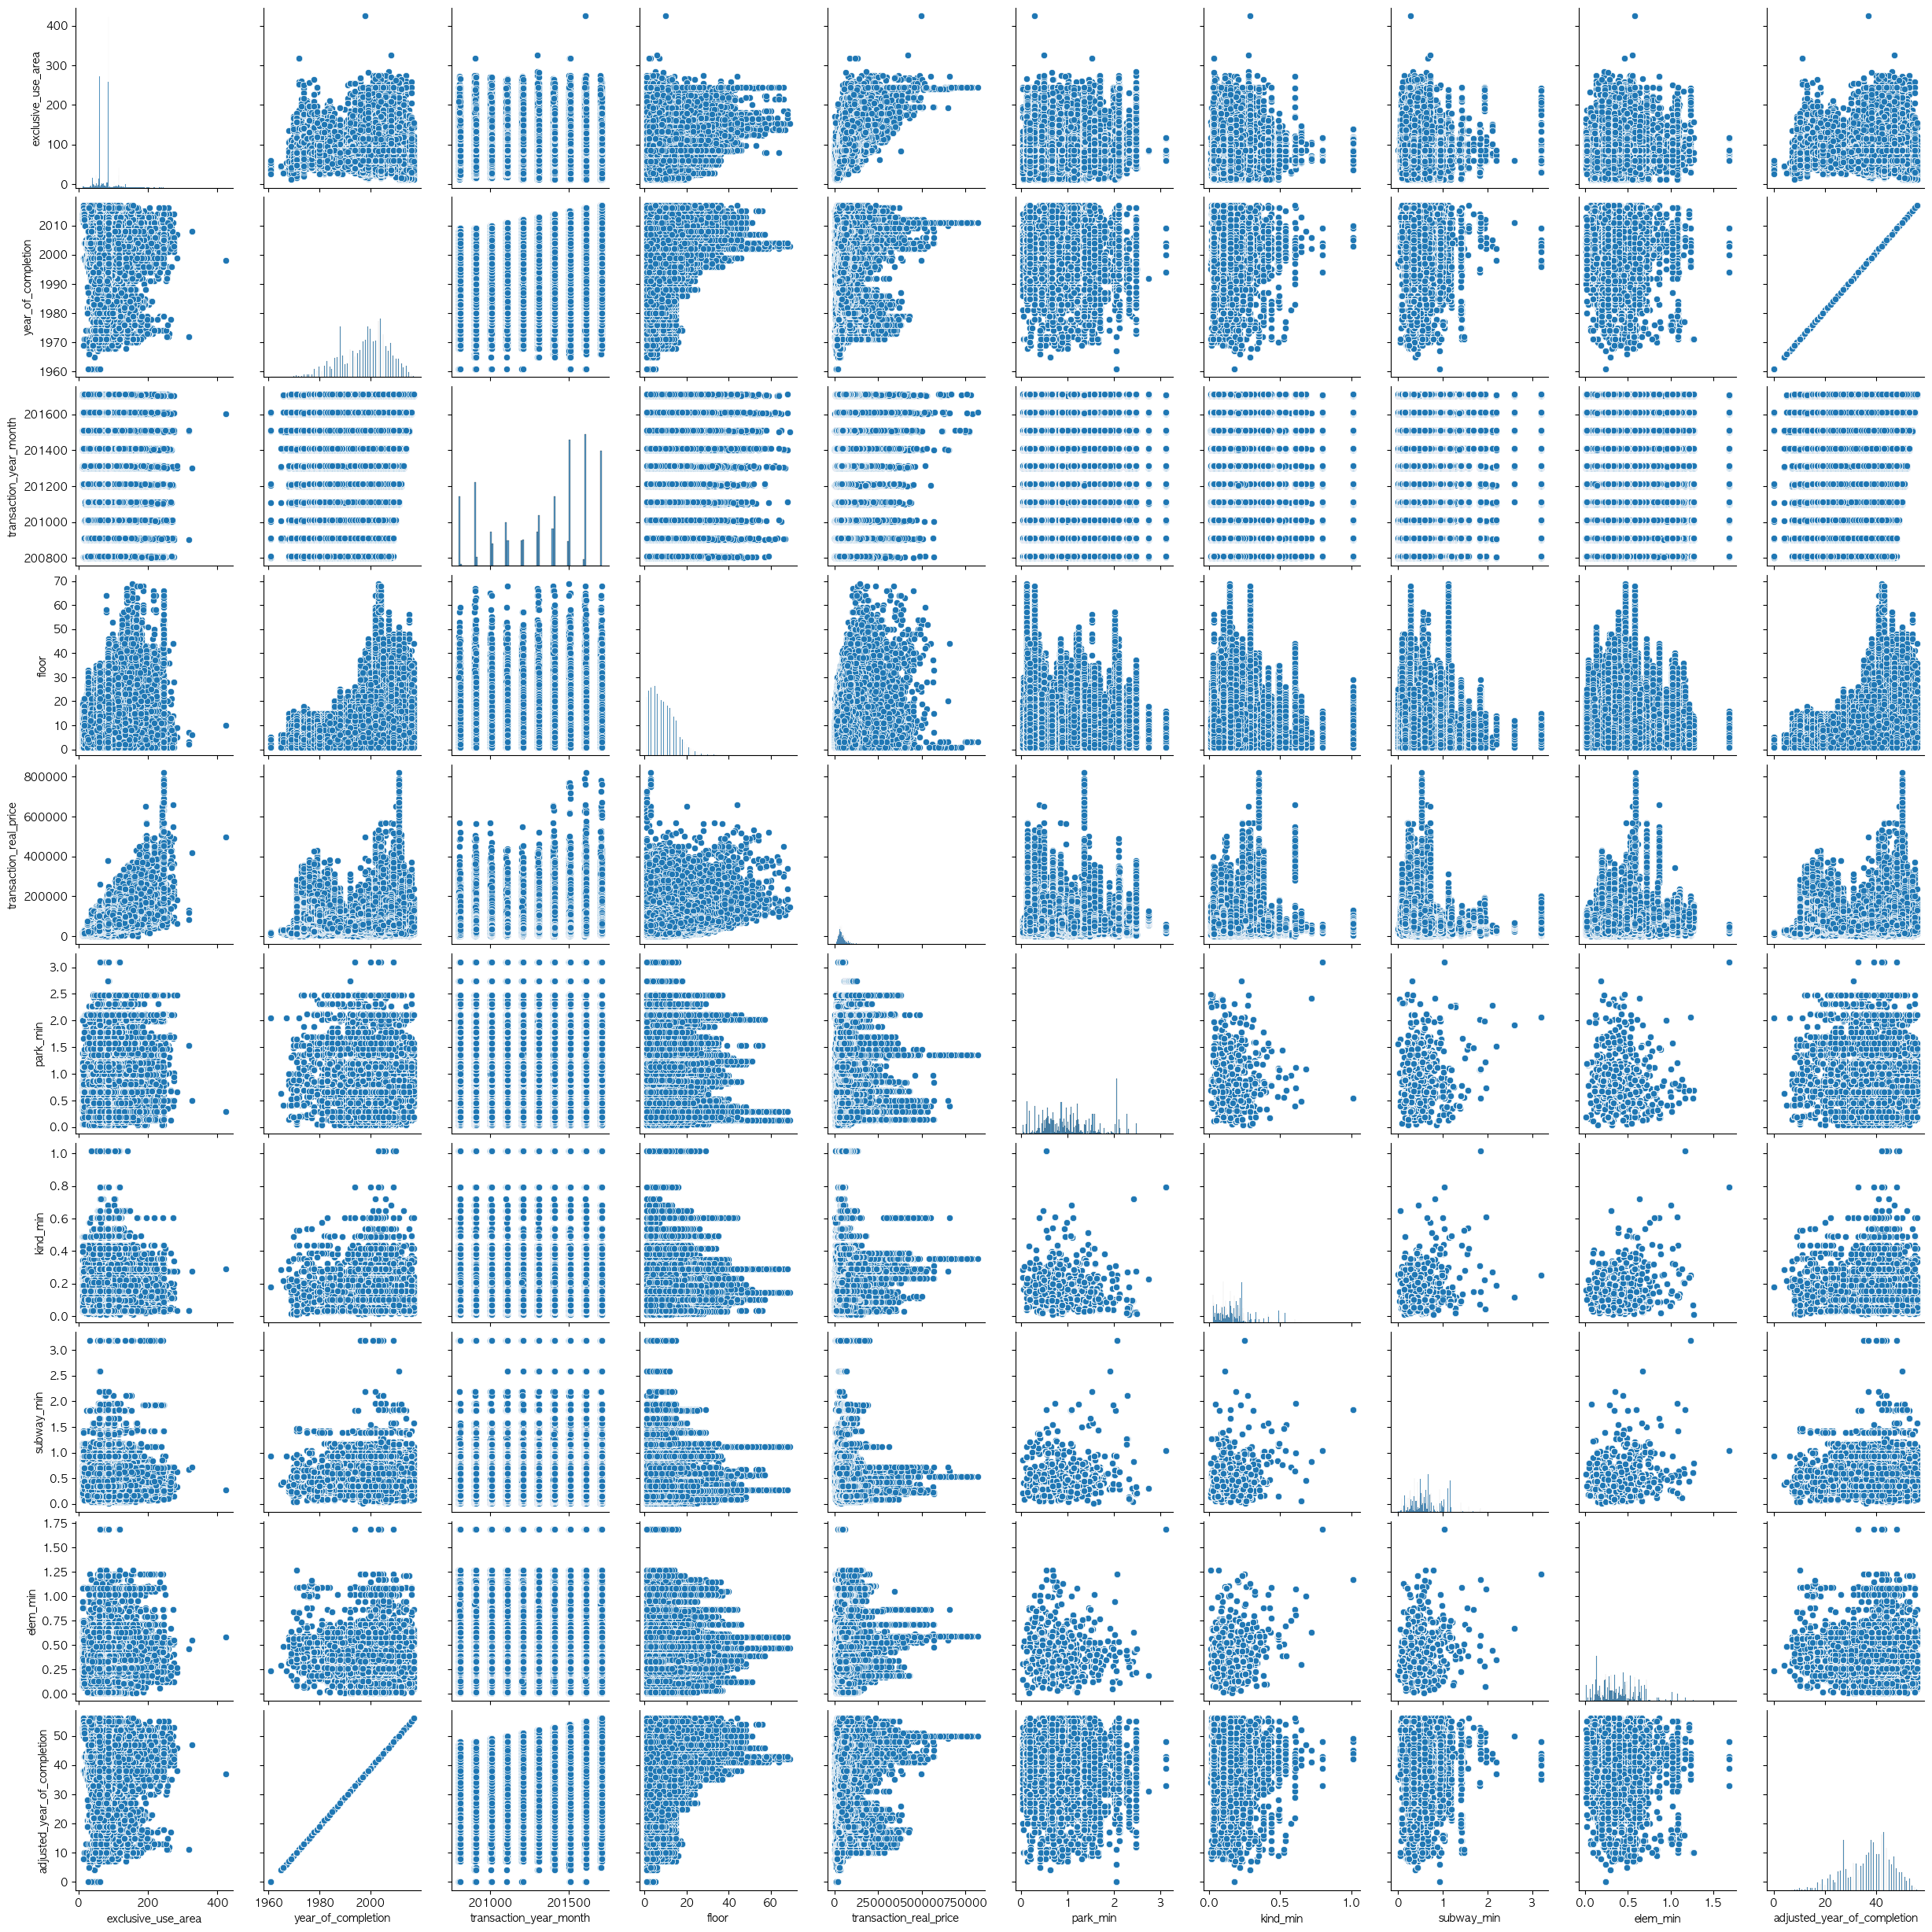

In [43]:
sns.pairplot(train_processed[['exclusive_use_area', 'year_of_completion', 'transaction_year_month', 'floor',
                              'transaction_real_price', 'park_min', 'kind_min', 'subway_min', 'elem_min', 
                              'adjusted_year_of_completion']])
plt.show()

##### 상관관계

In [44]:
corr_train = train_processed.select_dtypes(include='number').corr()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


/Users/kangminji/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


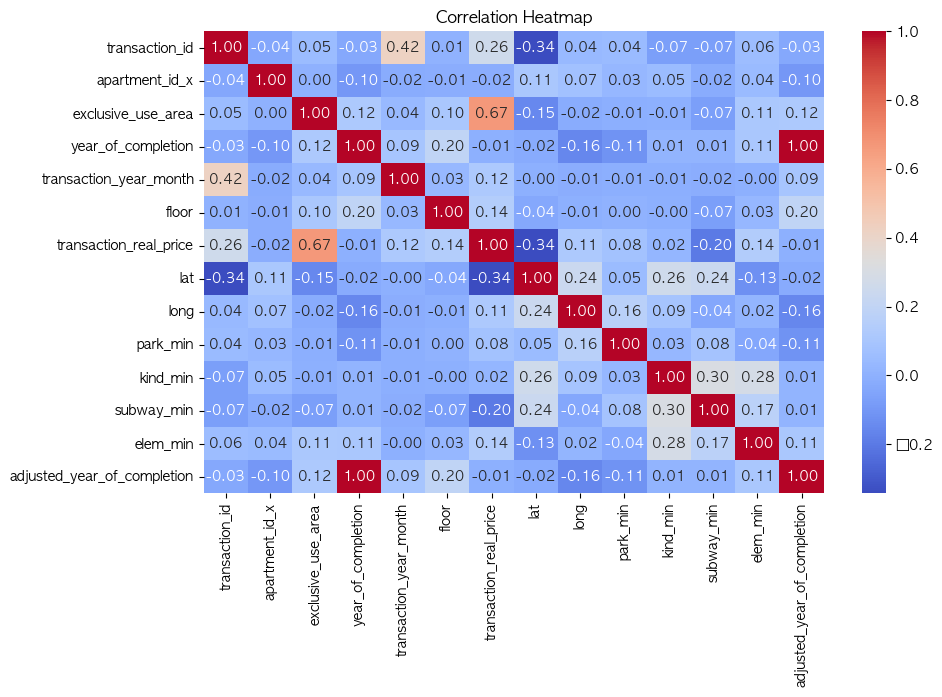

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### t-검정

- 서울 아파트의 동과 거래 가격 간의 관계 검정

In [46]:
from scipy import stats

# 서울 내의 모든 동에 대한 데이터 추출
seoul_dong_prices = {}

for dong in train_processed['dong'].unique():
    seoul_dong_prices[dong] = train_processed[train_processed['dong'] == dong]['transaction_real_price']

# t-검정 수행
t_statistic, p_value = stats.f_oneway(*seoul_dong_prices.values())

# 유의수준 0.05에서의 p-value 출력
print("One-way ANOVA t-statistic:", t_statistic)
print("One-way ANOVA p-value:", p_value)

One-way ANOVA t-statistic: 2423.0083436959917
One-way ANOVA p-value: 0.0


In [47]:
# p-value가 유의수준보다 작으면 적어도 하나의 동에서 평균 거래 가격이 다르다고 판단할 수 있음
if p_value < 0.05:
    print("최소한 하나의 동에서 평균 거래 가격이 다르다고 할 수 있습니다.")
else:
    print("모든 동에서 평균 거래 가격이 동일하다고 할 수 있습니다.")

최소한 하나의 동에서 평균 거래 가격이 다르다고 할 수 있습니다.


- 서울 아파트의 면적 거래 가격 간의 관계 검정 

In [48]:
# "exclusive_use_area"와 "transaction_real_price" 추출
exclusive_use_area = train_processed['exclusive_use_area']
transaction_real_price = train_processed['transaction_real_price']

# Pearson 상관계수 및 p-value 계산
correlation, p_value = stats.pearsonr(exclusive_use_area, transaction_real_price)

# 결과 출력
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.6687167785659293
p-value: 0.0


In [49]:
# p-value가 유의수준보다 작으면 상관관계가 통계적으로 유의미하다고 판단
if p_value < 0.05:
    print("전용면적과 거래 가격 간에는 통계적으로 유의미한 상관관계가 있습니다.")
else:
    print("전용면적과 거래 가격 간에는 통계적으로 유의미한 상관관계가 없습니다.")

전용면적과 거래 가격 간에는 통계적으로 유의미한 상관관계가 있습니다.


- 서울 아파트의 층수와 거래 가격 간의 관계 검정

In [50]:
# "floor"와 "transaction_real_price" 추출
floor = train_processed['floor']
transaction_real_price = train_processed['transaction_real_price']

# Pearson 상관계수 및 p-value 계산
correlation, p_value = stats.pearsonr(floor, transaction_real_price)

# 결과 출력
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.1423612780445626
p-value: 0.0


In [51]:
# p-value가 유의수준보다 작으면 상관관계가 통계적으로 유의미하다고 판단
if p_value < 0.05:
    print("층수와 거래 가격 간에는 통계적으로 유의미한 상관관계가 있습니다.")
else:
    print("층수와 거래 가격 간에는 통계적으로 유의미한 상관관계가 없습니다.")

층수와 거래 가격 간에는 통계적으로 유의미한 상관관계가 있습니다.


In [52]:
train_processed['park_min'].value_counts()

park_min
2.050811    29315
0.982854    16389
2.271736    15564
0.290582    14990
2.048868    14048
            ...  
2.323483        1
2.477774        1
2.431698        1
0.712533        1
0.552306        1
Name: count, Length: 544, dtype: int64

- 서울 아파트의 공원, 어린이집, 지하철, 초등학교 거리와 거래 가격 간의 상관관계

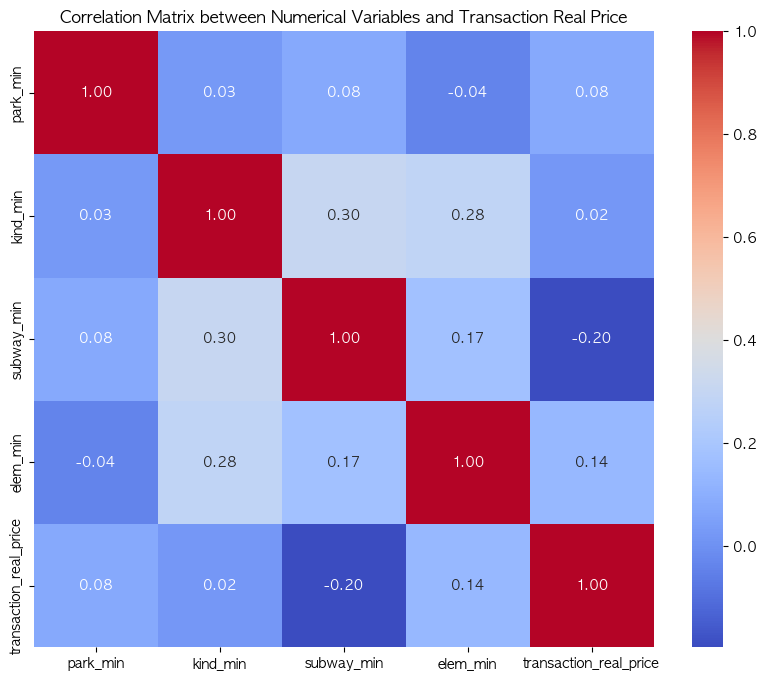

In [53]:
# 주어진 수치형 변수들과 transaction_real_price 추출
numerical_variables = ['park_min', 'kind_min', 'subway_min', 'elem_min']
transaction_real_price = train_processed['transaction_real_price']

# 상관 행렬 계산
correlation_matrix = train_processed[numerical_variables + ['transaction_real_price']].corr()

# Heatmap으로 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Numerical Variables and Transaction Real Price')
plt.show()

In [54]:
from scipy.stats import ttest_ind

data = train_processed[numerical_variables]

# 각 변수와 transaction_real_price 간의 t-검정 수행
for variable, values in data.items():
    t_statistic, p_value = ttest_ind(values, train_processed['transaction_real_price'])
    print(f"Variable: {variable}")
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value}")
    if p_value < 0.05:
        print("귀무 가설을 기각합니다. {}와(과) transaction_real_price 간에는 유의미한 관계가 있습니다.".format(variable))
    else:
        print("귀무 가설을 기각하지 않습니다. {}와(과) transaction_real_price 간에는 유의미한 관계가 없습니다.".format(variable))
    print()

Variable: park_min
t-statistic: -1250.7798947152467
p-value: 0.0
귀무 가설을 기각합니다. park_min와(과) transaction_real_price 간에는 유의미한 관계가 있습니다.

Variable: kind_min
t-statistic: -1250.8015529262461
p-value: 0.0
귀무 가설을 기각합니다. kind_min와(과) transaction_real_price 간에는 유의미한 관계가 있습니다.

Variable: subway_min
t-statistic: -1250.7908474237786
p-value: 0.0
귀무 가설을 기각합니다. subway_min와(과) transaction_real_price 간에는 유의미한 관계가 있습니다.

Variable: elem_min
t-statistic: -1250.7959756283062
p-value: 0.0
귀무 가설을 기각합니다. elem_min와(과) transaction_real_price 간에는 유의미한 관계가 있습니다.



##### 범주형 데이터

In [55]:
train_processed.select_dtypes(include='object')

,city,dong,jibun,apt,addr_kr,transaction_date,address
0,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),21~31,서울특별시 신교동 6-13
1,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,1~10,서울특별시 필운동 142
2,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,1~10,서울특별시 필운동 174-1
3,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,11~20,서울특별시 내수동 95
4,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,21~31,서울특별시 내수동 110-15
...,...,...,...,...,...,...,...
742280,서울특별시,강일동,717,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,11~20,서울특별시 강일동 717
742281,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,21~30,서울특별시 강일동 674
742282,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,21~30,서울특별시 강일동 674
742283,서울특별시,강일동,665,강일리버파크1단지,강일동 665 강일리버파크1단지,21~30,서울특별시 강일동 665


- 필요없는 칼럼 삭제

In [56]:
# 서울특별시 데이터만 있기 때문에 city 제거
# jibun, add_kr, address 도 위도, 경도가 있기 때문에 제거
train_processed.drop(columns=['city', 'jibun', 'addr_kr', 'address'], inplace=True)
train_processed.select_dtypes(include='object')

,dong,apt,transaction_date
0,신교동,신현(101동),21~31
1,필운동,사직파크맨션,1~10
2,필운동,두레엘리시안,1~10
3,내수동,파크팰리스,11~20
4,내수동,킹스매너,21~31
...,...,...,...
742280,강일동,고덕리엔파크2단지,11~20
742281,강일동,강일리버파크3단지,21~30
742282,강일동,강일리버파크3단지,21~30
742283,강일동,강일리버파크1단지,21~30


In [57]:
train_processed['apt'].unique()

array(['신현(101동)', '사직파크맨션', '두레엘리시안', ..., '대성골드클래스', '청호 뜨레피움 퍼스트 아파트',
       '래미안강동팰리스'], dtype=object)

In [58]:
# apt도 제거
train_processed.drop(columns='apt', inplace=True)

- One-Hot Encoding

In [59]:
train_processed['transaction_date'].value_counts()

transaction_date
11~20    249873
1~10     238129
21~31    154255
21~30     80230
21~28     13667
21~29      6131
Name: count, dtype: int64

transaction_date   
이를 원-핫 인코딩으로 처리하면 6개의 새로운 이진 변수가 추가된다.   
따라서 데이터셋의 차원이 크게 증가할 수 있다.  
transaction_date를 첫째 주, 둘째 주, 셋째 주로 나타내는 변수로 변환할 수 있다.   
이렇게 함으로써 데이터셋의 차원을 줄이고 모델의 복잡성을 줄일 수 있다.   

In [60]:
# 'transaction_date'를 월별 일자 범위로 나누는 함수 정의
def categorize_transaction_date(date_range):
    if '1~10' in date_range:
        return 'first_week'
    elif '11~20' in date_range:
        return 'second_week'
    else:
        return 'third_week'

In [61]:
# 'transaction_date'를 범주형 데이터로 변환하여 새로운 열 추가
train_processed['transaction_week'] = train_processed['transaction_date'].apply(categorize_transaction_date)

# 'transaction_week' 열을 원-핫 인코딩
train_processed = pd.get_dummies(train_processed, columns=['transaction_week'])

# 'transaction_date' 및 중간 단계 열 삭제
train_processed.drop(columns=['transaction_date'], inplace=True)

# 결과 확인
train_processed.isna().sum()

transaction_id                  0
apartment_id_x                  0
dong                            0
exclusive_use_area              0
year_of_completion              0
transaction_year_month          0
floor                           0
transaction_real_price          0
lat                             0
long                            0
park_min                        0
kind_min                        0
subway_min                      0
elem_min                        0
adjusted_year_of_completion     0
transaction_week_first_week     0
transaction_week_second_week    0
transaction_week_third_week     0
dtype: int64

In [62]:
# transaction_week 0, 1로 변경
train_processed.replace({True: 1, False: 0}, inplace=True)

In [63]:
train_processed.head()

,transaction_id,apartment_id_x,dong,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,lat,long,park_min,kind_min,subway_min,elem_min,adjusted_year_of_completion,transaction_week_first_week,transaction_week_second_week,transaction_week_third_week
0,0,7622,신교동,84.82,2002,200801,2,37500,37.584160,126.967230,0.831168,0.295177,1.086383,0.266380,41,0,0,1
1,1,5399,필운동,99.17,1973,200801,6,20000,37.577363,126.969097,0.213923,0.089404,0.429346,0.211640,12,1,0,0
2,2,3578,필운동,84.74,2007,200801,6,38500,37.577363,126.969097,0.213923,0.089404,0.429346,0.211640,46,1,0,0
3,3,10957,내수동,146.39,2003,200801,15,118000,37.572940,126.971800,0.365575,0.102862,0.348871,0.566101,42,0,1,0
4,4,10639,내수동,194.43,2004,200801,3,120000,37.572940,126.971800,0.365575,0.102862,0.348871,0.566101,43,0,0,1


- Target Encoding  
각 동을 해당 동의 평균 주택 가격으로 매핑하여 변환하는 방법  
즉, 각 동의 평균 주택 가격을 사용하여 해당 동을 대표하는 숫자로 인코딩

In [64]:
train_processed['dong'].nunique()

330

In [65]:
# 각 동별 평균 주택 가격 계산
dong_mean_prices = train_processed.groupby('dong')['transaction_real_price'].mean()
dong_mean_prices

dong
가락동     54967.955681
가리봉동    24241.186441
가산동     26812.244082
가양동     32263.930082
갈월동     48662.500000
            ...     
효창동     51399.878378
후암동     49870.036496
휘경동     34295.183976
흑석동     63784.781627
흥인동     74039.456432
Name: transaction_real_price, Length: 330, dtype: float64

In [66]:
# 각 동을 해당 동의 평균 주택 가격으로 매핑하여 변환
train_processed['encoded_dong'] = train_processed['dong'].map(dong_mean_prices)
train_processed.isna().sum()

transaction_id                  0
apartment_id_x                  0
dong                            0
exclusive_use_area              0
year_of_completion              0
transaction_year_month          0
floor                           0
transaction_real_price          0
lat                             0
long                            0
park_min                        0
kind_min                        0
subway_min                      0
elem_min                        0
adjusted_year_of_completion     0
transaction_week_first_week     0
transaction_week_second_week    0
transaction_week_third_week     0
encoded_dong                    0
dtype: int64

In [67]:
train_processed.drop(columns='dong', inplace=True)

#### test_processed

In [68]:
test_processed.head()

,transaction_id,apartment_id_x,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,address,lat,long,park_min,kind_min,subway_min,elem_min,adjusted_year_of_completion
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.55,2002,201711,11~20,2,서울특별시 목동 938,37.536080,126.875850,0.131990,0.147315,1.112265,0.469175,41
1,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.54,2004,201707,1~10,10,서울특별시 대치동 1007-2,37.498820,127.065660,1.581849,0.151964,0.496983,0.527390,43
2,1151450,9179,서울특별시,염창동,254-2,이너스내안에,염창동 254-2 이너스내안에,84.91,2004,201711,1~10,13,서울특별시 염창동 254-2,37.557356,126.869930,0.107957,0.187910,0.704454,0.314947,43
3,1197195,4018,서울특별시,암사동,414-2,롯데캐슬퍼스트,암사동 414-2 롯데캐슬퍼스트,102.34,2008,201712,21~31,9,서울특별시 암사동 414-2,37.558235,127.130854,1.580956,0.415310,0.938369,1.022213,47
4,1146078,4397,서울특별시,신정동,311,목동신시가지10,신정동 311 목동신시가지10,106.06,1987,201712,11~20,4,서울특별시 신정동 311,37.543050,126.931100,0.982854,0.118062,0.496211,0.717592,26


- One-Hot Encoding

In [69]:
# 'transaction_date'를 범주형 데이터로 변환하여 새로운 열 추가
test_processed['transaction_week'] = test_processed['transaction_date'].apply(categorize_transaction_date)

# 'transaction_week' 열을 원-핫 인코딩
test_processed = pd.get_dummies(test_processed, columns=['transaction_week'])

# 'transaction_date' 및 중간 단계 열 삭제
test_processed.drop(columns=['transaction_date'], inplace=True)

# 결과 확인
test_processed.isna().sum()

transaction_id                  0
apartment_id_x                  0
city                            0
dong                            0
jibun                           0
apt                             0
addr_kr                         0
exclusive_use_area              0
year_of_completion              0
transaction_year_month          0
floor                           0
address                         0
lat                             0
long                            0
park_min                        0
kind_min                        0
subway_min                      0
elem_min                        0
adjusted_year_of_completion     0
transaction_week_first_week     0
transaction_week_second_week    0
transaction_week_third_week     0
dtype: int64

In [70]:
test_processed.head()

,transaction_id,apartment_id_x,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,...,lat,long,park_min,kind_min,subway_min,elem_min,adjusted_year_of_completion,transaction_week_first_week,transaction_week_second_week,transaction_week_third_week
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.55,2002,201711,...,37.536080,126.875850,0.131990,0.147315,1.112265,0.469175,41,False,True,False
1,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.54,2004,201707,...,37.498820,127.065660,1.581849,0.151964,0.496983,0.527390,43,True,False,False
2,1151450,9179,서울특별시,염창동,254-2,이너스내안에,염창동 254-2 이너스내안에,84.91,2004,201711,...,37.557356,126.869930,0.107957,0.187910,0.704454,0.314947,43,True,False,False
3,1197195,4018,서울특별시,암사동,414-2,롯데캐슬퍼스트,암사동 414-2 롯데캐슬퍼스트,102.34,2008,201712,...,37.558235,127.130854,1.580956,0.415310,0.938369,1.022213,47,False,False,True
4,1146078,4397,서울특별시,신정동,311,목동신시가지10,신정동 311 목동신시가지10,106.06,1987,201712,...,37.543050,126.931100,0.982854,0.118062,0.496211,0.717592,26,False,True,False


### 데이터 분할

In [71]:
# X_train = train_processed.drop(columns='transaction_real_price')
# y_train = train_processed['transaction_real_price']
# X_test = test_processed

In [72]:
X = train_processed.drop(columns=['transaction_real_price'])
y = train_processed['transaction_real_price']

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(f'X train shape : {X_train.shape}')
print(f'y train shape : {y_train.shape}')
print(f'X test shape : {X_test.shape}')
print(f'y test shape : {y_test.shape}')

X train shape : (593828, 17)
y train shape : (593828,)
X test shape : (148457, 17)
y test shape : (148457,)


## 회귀 분석 

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("Train MSE:", mse_train)

Train MSE: 277947248.0014334


In [75]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test MSE:", mse_test)

Test MSE: 273977391.950412


- MSE(Mean Squared Error)가 상당히 높게 나타난다.  
이는 모델이 데이터를 잘 예측하지 못하고 있다는 것을 의미다.   
이러한 결과는 선형 회귀 모델이 데이터에 잘 적합되지 않았거나 데이터에 비선형성이 존재할 수 있다.  

### 잔차 분석

/Users/kangminji/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


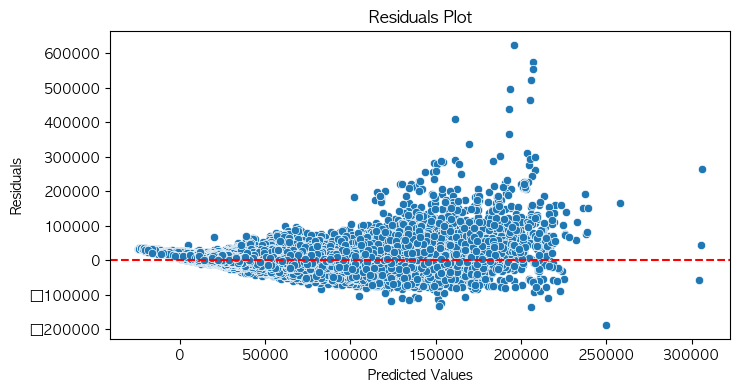

In [76]:
residuals = y_test - y_pred_test
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

- 이미지 분석  
    - 잔차 플롯 패턴
        - 잔차 플롯이 위쪽으로 곡선 형태를 보이면 데이터는 양의 비선형 관계를 가지고 있다고 볼 수 있다.   
        - 즉, 예측값이 실제값보다 작아지는 경향이 있다.
    - 결론
        - 이 이미지는 데이터가 선형 관계를 가지고 있지 않고 양의 비선형 관계를 가지고 있다.

- 추가 분석
    - 다른 모델 고려
        - 선형 회귀 모델 외에 다른 모델 (예: 다항 회귀, 로지스틱 회귀)을 사용하여 데이터를 모델링하는 것이 더 적합
    - 모델 비교
        - 모델 비교 지표 (예: R^2, AIC, BIC)를 사용하여 모델의 성능을 비교하고 가장 적합한 모델을 선택할 수 있다.


## 모델 선택 및 학습

### RandomForest

In [77]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

In [78]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
import pickle

# 모델 저장
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_reg, f)

In [80]:
y_pred_rf = rf_reg.predict(X_test)

#### 주요 속성 출력

In [81]:
print("Number of trees in the forest:", rf_reg.n_estimators)
print("Maximum depth of trees:", rf_reg.max_depth)
print("Minimum samples required to split a node:", rf_reg.min_samples_split)
print("Minimum samples required at each leaf node:", rf_reg.min_samples_leaf)
print("Maximum number of features to consider at each split:", rf_reg.max_features)
print("Bootstrap samples when building trees:", rf_reg.bootstrap)
print("Out-of-bag score to estimate the R^2 on unseen data:", rf_reg.oob_score)
print("Feature importances:", rf_reg.feature_importances_)

Number of trees in the forest: 100
Maximum depth of trees: None
Minimum samples required to split a node: 2
Minimum samples required at each leaf node: 1
Maximum number of features to consider at each split: 1.0
Bootstrap samples when building trees: True
Out-of-bag score to estimate the R^2 on unseen data: False
Feature importances: [2.92369371e-02 2.10594132e-02 3.50780955e-01 2.54764821e-02
 2.61981875e-02 1.08057801e-02 6.13314894e-03 7.72809731e-03
 6.79566520e-03 1.68440808e-02 4.23831213e-03 7.75930547e-03
 2.56054542e-02 4.53416727e-04 4.51256340e-04 4.92879715e-04
 4.59940628e-01]


In [82]:
print("Random Forest Feature Importances:")
for feature, importance in zip(X_train.columns, rf_reg.feature_importances_):
    print(feature, ":", importance)

Random Forest Feature Importances:


transaction_id : 0.029236937111943494
apartment_id_x : 0.021059413154138788
exclusive_use_area : 0.3507809548898848
year_of_completion : 0.02547648212308219
transaction_year_month : 0.026198187453281428
floor : 0.010805780109262437
lat : 0.006133148942507516
long : 0.007728097308909392
park_min : 0.006795665197566933
kind_min : 0.016844080782973746
subway_min : 0.004238312127620853
elem_min : 0.007759305466898498
adjusted_year_of_completion : 0.025605454219048127
transaction_week_first_week : 0.00045341672728665164
transaction_week_second_week : 0.00045125634028824813
transaction_week_third_week : 0.0004928797151745736
encoded_dong : 0.4599406283301324


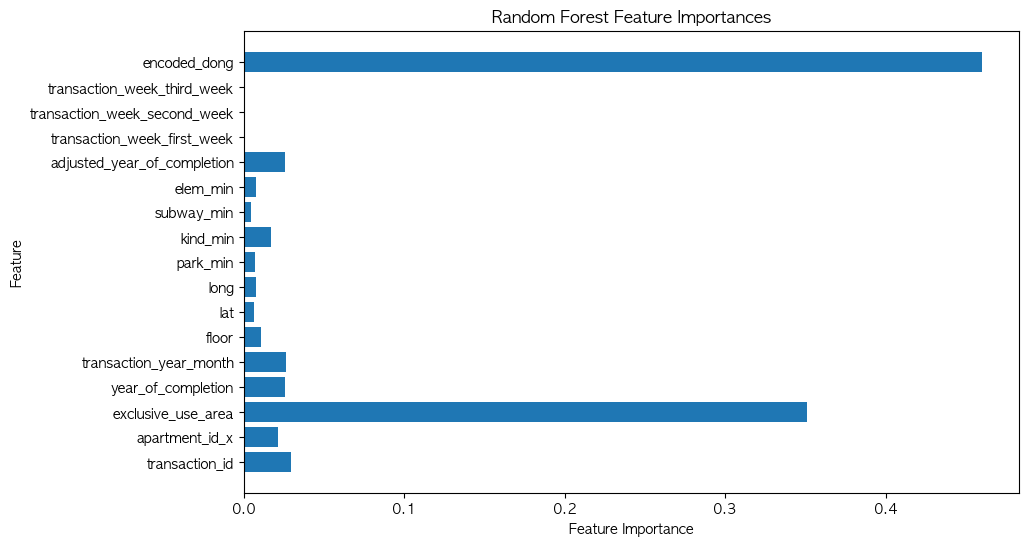

In [83]:
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, rf_reg.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

### PolynomialFeatures

In [84]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)  # 2차 다항식 사용
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()

In [85]:
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [86]:
# 모델 저장
with open('polynomial_model.pkl', 'wb') as f:
    pickle.dump(poly_reg, f)

In [87]:
y_pred_poly = poly_reg.predict(X_test_poly)

#### 주요 속성 출력

In [88]:
print("Polynomial Regression Coefficients:", poly_reg.coef_)
print("Intercept:", poly_reg.intercept_)

Polynomial Regression Coefficients: [-3.92710889e-01  8.27674239e+01  3.40403512e+00 -5.12157408e+00
  1.48982135e+00 -7.68455242e-01  2.25329850e+00  6.86905422e+00
  1.25176541e+01 -7.66612084e-01 -1.00488413e+00 -2.35601046e-01
  6.61821887e-01 -3.27734753e-03  2.62359951e-02  1.52550320e-02
  1.70080549e-02 -7.14654002e-02  4.63834247e-09 -1.67816078e-07
  5.14456718e-05 -4.21634722e-02 -4.95337007e-08 -2.26071691e-05
  3.05552418e-03 -1.50889256e-03 -3.62445200e-04 -4.44472740e-03
 -3.36883042e-03 -1.00651394e-05  4.18637628e-02 -1.26176470e-03
 -5.23837787e-04  5.36256377e-05  2.71171724e-07 -5.79396689e-06
  2.62607462e-03 -8.10088931e-03  6.43303491e-05  6.02255182e-03
  1.50901685e+00 -4.49261097e-01 -5.12394890e-02  9.34994777e-01
 -3.85666943e-01 -1.74629054e-01  7.96936112e-03  1.03265242e-02
  7.97587559e-03 -1.81936378e-02 -4.10863639e-06  3.24586570e-02
  4.48233632e+00 -1.36955818e-01  6.32513827e+00  3.03612328e+02
  5.65255763e+01 -3.36096092e+01  3.66961158e+02 -9.77

### GradientBoostingRegressor

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()

In [90]:
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [91]:
# 모델 저장
with open('gradientboost_model.pkl', 'wb') as f:
    pickle.dump(gb_reg, f)

In [127]:
y_pred_gb = gb_reg.predict(X_train)

#### 주요 속성 출력

In [93]:
print("Gradient Boosting Feature Importances:", gb_reg.feature_importances_)

Gradient Boosting Feature Importances: [2.16071431e-02 2.74026439e-03 3.73771715e-01 1.89285983e-02
 1.80677100e-02 6.02457919e-03 1.36044838e-03 2.90274055e-03
 1.05734020e-03 9.74777191e-03 2.86812934e-04 2.22736212e-03
 1.92873874e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.21990127e-01]


In [94]:
print("Gradient Boosting Feature Importances:")
for feature, importance in zip(X_train.columns, gb_reg.feature_importances_):
    print(feature, ":", importance)

Gradient Boosting Feature Importances:
transaction_id : 0.021607143091156935
apartment_id_x : 0.002740264387512486
exclusive_use_area : 0.3737717146751055
year_of_completion : 0.018928598293980237
transaction_year_month : 0.01806771004940455
floor : 0.006024579187071477
lat : 0.0013604483837813927
long : 0.0029027405504736164
park_min : 0.0010573402017833866
kind_min : 0.009747771909695915
subway_min : 0.00028681293412581804
elem_min : 0.002227362119635117
adjusted_year_of_completion : 0.01928738736459272
transaction_week_first_week : 0.0
transaction_week_second_week : 0.0
transaction_week_third_week : 0.0
encoded_dong : 0.5219901268516808


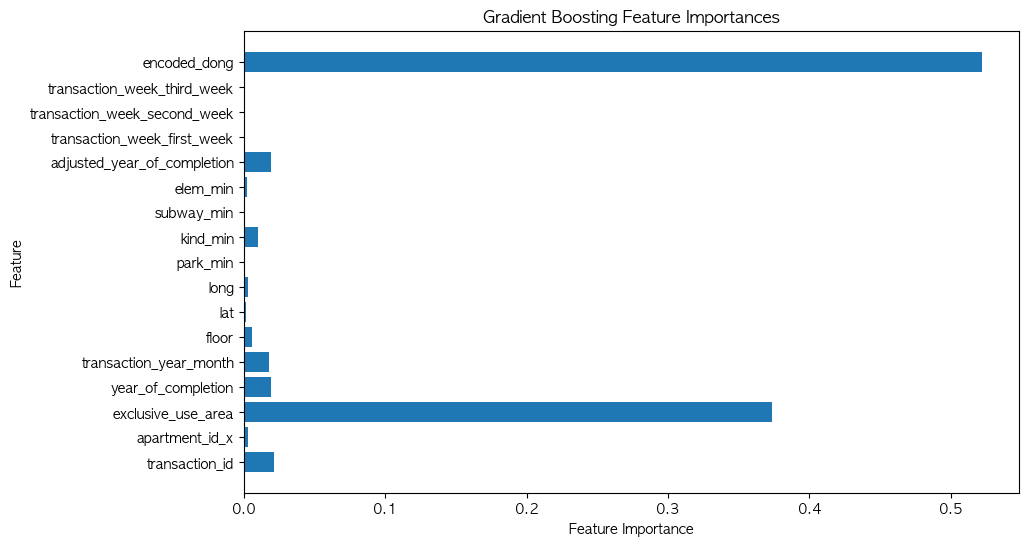

In [95]:
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, gb_reg.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importances')
plt.show()

### Neural Networks

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 신경망 모델 정의
model = Sequential([
    Dense(64, activation='relu', input_shape=(17,)),
    Dense(64, activation='relu'),
    Dense(1)  # 출력 뉴런 1개 (예측값)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

2024-02-24 21:38:56.747454: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
18558/18558 [==============================] - 59s 3ms/step - loss: 527239200.0000 - mae: 13816.1436 - val_loss: 444060160.0000 - val_mae: 13092.5020
Epoch 2/100
18558/18558 [==============================] - 43s 2ms/step - loss: 324779296.0000 - mae: 10989.4502 - val_loss: 239184608.0000 - val_mae: 9347.3975
Epoch 3/100
18558/18558 [==============================] - 63s 3ms/step - loss: 282952512.0000 - mae: 10424.8301 - val_loss: 242655920.0000 - val_mae: 9339.0557
Epoch 4/100
18558/18558 [==============================] - 51s 3ms/step - loss: 273718080.0000 - mae: 10302.8330 - val_loss: 223067840.0000 - val_mae: 9309.0088
Epoch 5/100
18558/18558 [==============================] - 90s 5ms/step - loss: 264853952.0000 - mae: 10119.5596 - val_loss: 254662096.0000 - val_mae: 9421.6230
Epoch 6/100
18558/18558 [==============================] - 61s 3ms/step - loss: 257815312.0000 - mae: 9979.1914 - val_loss: 229623184.0000 - val_mae: 9228.5303
Epoch 7/100
18558/18558 [=========

In [111]:
# 모델 평가
loss, mae = model.evaluate(X_test, y_test)
print('loss: ', loss)
print('Test MAE:', mae)

4640/4640 [==============================] - 9s 2ms/step - loss: 202282768.0000 - mae: 8592.9902
loss:  202282768.0
Test MAE: 8592.990234375


In [112]:
# 모델 저장
model.save('transaction_price_prediction_model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 모델 성능 평가

### 회귀 모델 평가 지표 선택

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

### 학습 및 테스트 데이터에 대한 성능 평가

#### RandomForest

In [129]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [130]:
print("Random Forest Regression:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)

Random Forest Regression:
Mean Squared Error (MSE): 21216056.012706503
Root Mean Squared Error (RMSE): 4606.089014848335
R-squared (R2): 0.9813595384905477


1. Mean Squared Error (MSE)
    - MSE는 예측 값과 실제 값 사이의 차이를 제곱하여 평균한 값
    - MSE가 작을수록 모델의 예측이 실제 값과 가깝다고 할 수 있다. 
    - 예측값과 실제 값 사이의 평균적인 제곱 오차는 약 21,216,056이다.
2. Root Mean Squared Error (RMSE)
    - RMSE는 MSE의 제곱근으로, 예측 오차의 평균을 실제 값의 단위로 다시 변환한 값 
    - 따라서 RMSE가 작을수록 모델의 예측이 더 정확하다고 할 수 있다. 
    - 예측값과 실제 값 사이의 평균적인 오차는 약 4,606이다.
3. R-squared (R2)
    - R2는 종속 변수의 변동성을 설명하는 모델의 설명력을 나타내는 지표
    - R2는 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 종속 변수의 변동성을 완벽하게 설명한다는 것을 의미한다.
    - 이 모델의 R2 값이 약 0.9814이므로, 이 모델이 종속 변수의 변동성을 약 98.14%로 설명한다고 할 수 있다. 따라서 이 모델은 종속 변수를 상당히 잘 설명하고 있다.

/Users/kangminji/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


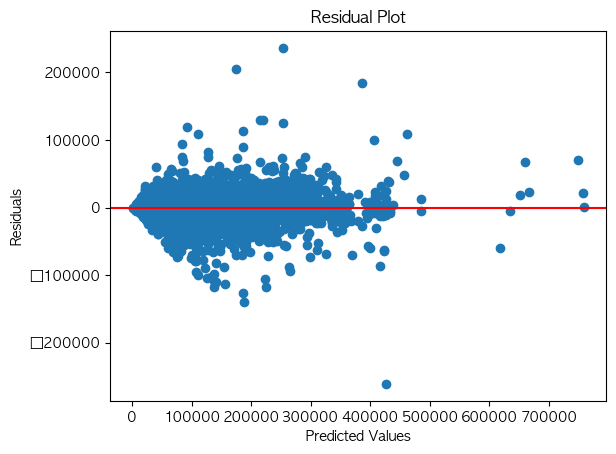

In [131]:
# 모델을 통해 예측값과 실제값 생성
rf_residuals = y_test - y_pred_rf

# 잔차 플롯 그리기
plt.scatter(y_pred_rf, rf_residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')  # 잔차가 0인 기준선 추가
plt.show()

- 잔차 플롯 분석
    - 수평선 주변 무작위 분포: 예측값과 실제값 사이에 체계적인 편향이 없음을 나타낸다.
    - 특정 패턴 존재: 모델이 데이터를 잘 설명하지 못하거나 모델 가정에 어긋나는 데이터 존재를 나타낸다.
    - 위쪽으로 곡선 형태: 예측값이 실제값보다 작아지는 경향이 있음을 나타낸다.
    - 양의 비선형 관계: 예측값이 증가할수록 잔차의 증가폭도 커지는 것을 보여준다.

#### PolynomialFeatures

In [132]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [133]:
print("Polynomial Regression:")
print("Mean Squared Error (MSE):", mse_poly)
print("Root Mean Squared Error (RMSE):", rmse_poly)
print("R-squared (R2):", r2_poly)

Polynomial Regression:
Mean Squared Error (MSE): 186160512.07691202
Root Mean Squared Error (RMSE): 13644.065086216498
R-squared (R2): 0.8364390696427595


1. Mean Squared Error (MSE)
    - MSE가 작을수록 모델의 예측이 실제 값과 가깝다고 할 수 있다. 
    - 예측값과 실제 값 사이의 평균적인 제곱 오차는 약 186,160,512이다.
2. Root Mean Squared Error (RMSE)
    - RMSE가 작을수록 모델의 예측이 더 정확하다고 할 수 있다. 
    - 예측값과 실제 값 사이의 평균적인 오차는 약 13,644이다.
3. R-squared (R2)
    - R2는 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 종속 변수의 변동성을 완벽하게 설명한
    - 이 모델의 R2 값이 약 0.8364이므로, 이 모델이 종속 변수의 변동성을 약 83.64%로 설명한다고 할 수 있다. 
    - 종속 변수의 변동성을 설명하는 데에는 적합한 모델이지만, 다소 낮은 설명력을 가지고 있다.






/Users/kangminji/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


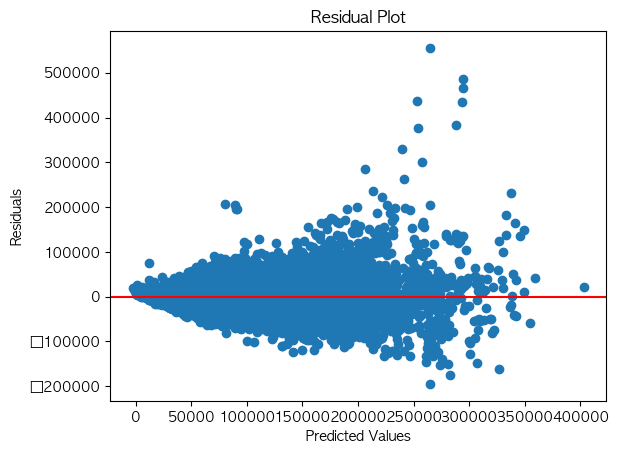

In [134]:
# 모델을 통해 예측값과 실제값 생성
poly_residuals = y_test - y_pred_poly

# 잔차 플롯 그리기
plt.scatter(y_pred_poly, poly_residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')  # 잔차가 0인 기준선 추가
plt.show()

- 잔차 플롯 분석  
    - 수평선 주변 무작위 분포: 데이터는 선형 관계를 가지고 있지만, 모델 예측값과 실제값 사이에 약간의 편향이 존재한다.
    - 특정 패턴 존재: 잔차가 뚜렷한 패턴을 보이지 않아, 모델 가정에 어긋나는 데이터는 없는 것으로 보인다.
    - 잔차가 0 주변에 넓게 분포: 모델 예측값의 오차가 평균적으로 크지 않지만, 일부 데이터는 예측값과 실제값 차이가 크다.
    - 양의 비선형 관계: 예측값이 증가할수록 잔차의 증가폭도 커지는 경향이 약하게 나타난다.

#### GradientBoostingRegressor

In [ ]:
for attr in dir(gb_reg):
    if not attr.startswith('_'): print(attr)

In [135]:
accuracy = gb_reg.score(X_test, y_test) # R-squared 값을 반환하는 메서드
print(f'{accuracy = }')

accuracy = 0.8869576630651891


### 교차 검증을 통한 모델 평가

#### RandomForest

In [138]:
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rf_reg, X_train, y_train, cv=5)

print("RandomForestRegressor Cross-Validation scores:", rf_scores)
print("Average RandomForestRegressor Cross-Validation score:", rf_scores.mean())

RandomForestRegressor Cross-Validation scores: [0.98084212 0.9810616  0.97933649 0.98017927 0.97993267]
Average RandomForestRegressor Cross-Validation score: 0.980270431209769


- 해석
    - 높은 교차 검증 점수(1에 가까움)는 랜덤 포레스트 회귀 모델이 주어진 데이터 세트에서 잘 작동한다.
    - 폴드 간 점수의 일관성은 모델이 잘 일반화되고 특정 학습 데이터 분할에 지나치게 민감하지 않음을 나타낸다.

- 교차 검증 점수의 상자 그림(boxplot)으로 시각화

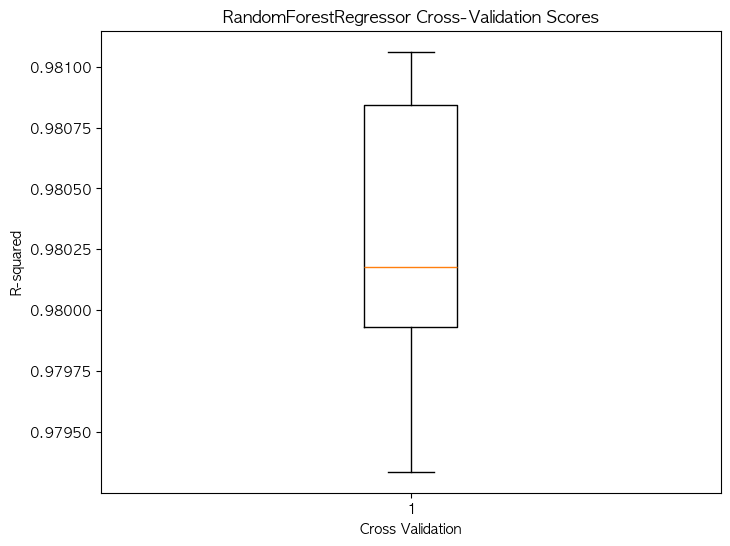

In [141]:
plt.figure(figsize=(8, 6))
plt.boxplot(rf_scores)
plt.xlabel('Cross Validation')
plt.ylabel('R-squared')
plt.title('RandomForestRegressor Cross-Validation Scores')
plt.show()

- RandomForestRegressor의 교차 검증 점수를 선 그래프로 시각화

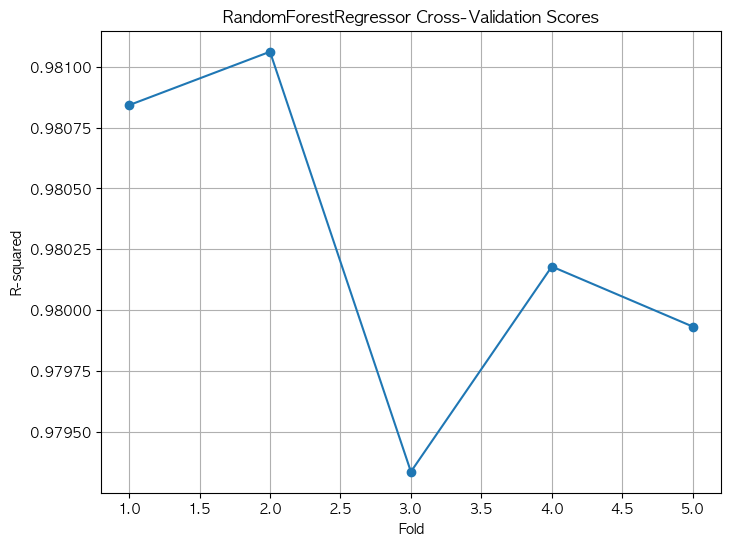

In [142]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rf_scores) + 1), rf_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('RandomForestRegressor Cross-Validation Scores')
plt.grid(True)
plt.show()

#### PolynomialFeatures

In [139]:
poly_scores = cross_val_score(poly_reg, X_train_poly, y_train, cv=5)

print("Polynomial Regression Cross-Validation scores:", poly_scores)
print("Average Polynomial Regression Cross-Validation score:", poly_scores.mean())

Polynomial Regression Cross-Validation scores: [0.83750118 0.8373971  0.83558274 0.83514561 0.83583725]
Average Polynomial Regression Cross-Validation score: 0.8362927765948772


- 해석
    - 이 교차 검증 점수는 다항 회귀 모델이 데이터를 설명하는 데 제한적인 성능을 보여준다.   - R-제곱 값이 1에 가까울수록 모델 성능이 좋지만, 이 경우 0.8363으로 상대적으로 낮은 값이다.
    - 이는 모델이 데이터의 패턴을 완전히 capture하지 못하고 실제값과 예측값 사이에 차이가 있음을 의미할 수 있다.

- 교차 검증 점수의 상자 그림(boxplot)으로 시각화

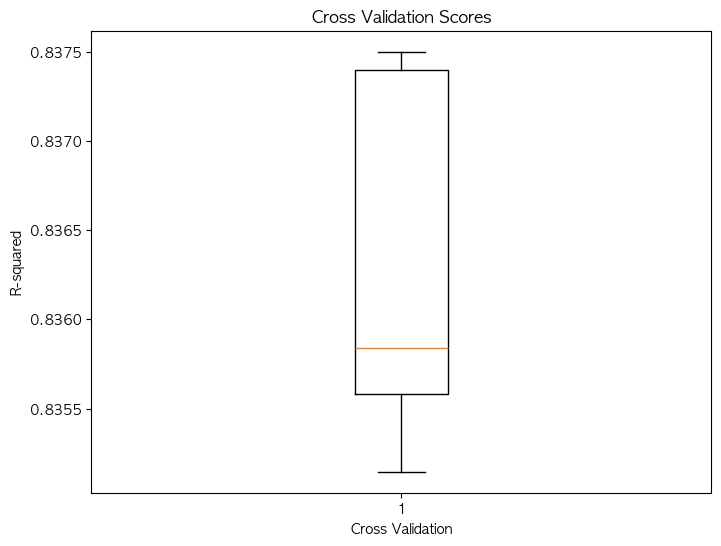

In [144]:
plt.figure(figsize=(8, 6))
plt.boxplot(poly_scores)
plt.xlabel('Cross Validation')
plt.ylabel('R-squared')
plt.title('Cross Validation Scores')
plt.show()

- Polynomial Regression의 교차 검증 점수를 선 그래프로 시각화

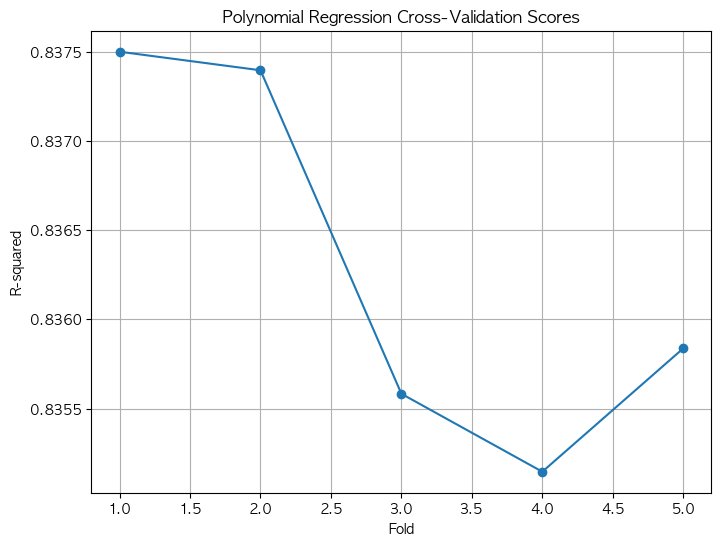

In [145]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(poly_scores) + 1), poly_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Polynomial Regression Cross-Validation Scores')
plt.grid(True)
plt.show()

#### GradientBoostingRegressor

In [140]:
gb_scores = cross_val_score(gb_reg, X_train, y_train, cv=5)

print("GradientBoostingRegressor Cross-Validation scores:", gb_scores)
print("Average GradientBoostingRegressor Cross-Validation score:", gb_scores.mean())

GradientBoostingRegressor Cross-Validation scores: [0.88867012 0.88667799 0.88768602 0.88487024 0.88758874]
Average GradientBoostingRegressor Cross-Validation score: 0.8870986221436306


- 해석
    - 이 교차 검증 점수는 그래디언트 부스팅 회귀 모델이 데이터를 설명하는 데 양호한 성능을 보여준다. 
    - R-제곱 값이 1에 가까울수록 모델 성능이 좋지만, 이 경우 0.8871은 완벽하지는 않지만 상당히 높은 값이다.
    - 이는 모델이 데이터의 패턴을 어느 정도 잘 학습하고 예측값과 실제값 사이의 차이가 상대적으로 적음을 의미할 수 있다.

- 교차 검증 점수의 상자 그림(boxplot)으로 시각화

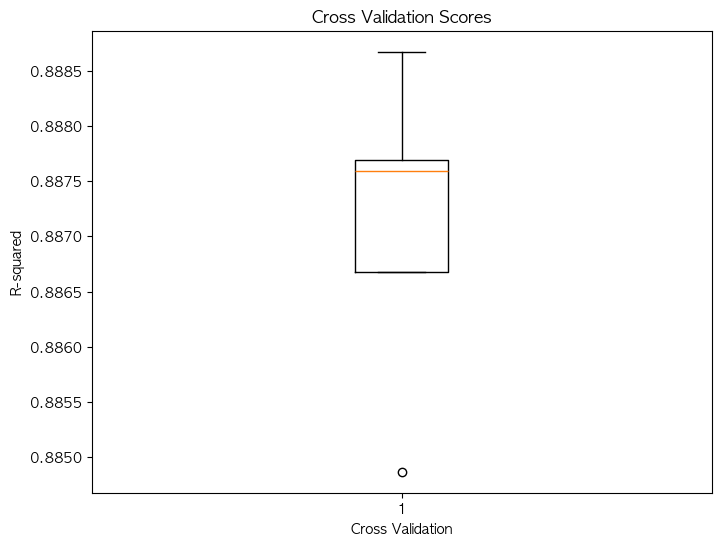

In [146]:
plt.figure(figsize=(8, 6))
plt.boxplot(gb_scores)
plt.xlabel('Cross Validation')
plt.ylabel('R-squared')
plt.title('Cross Validation Scores')
plt.show()

- GradientBoostingRegressor의 교차 검증 점수를 선 그래프로 시각화

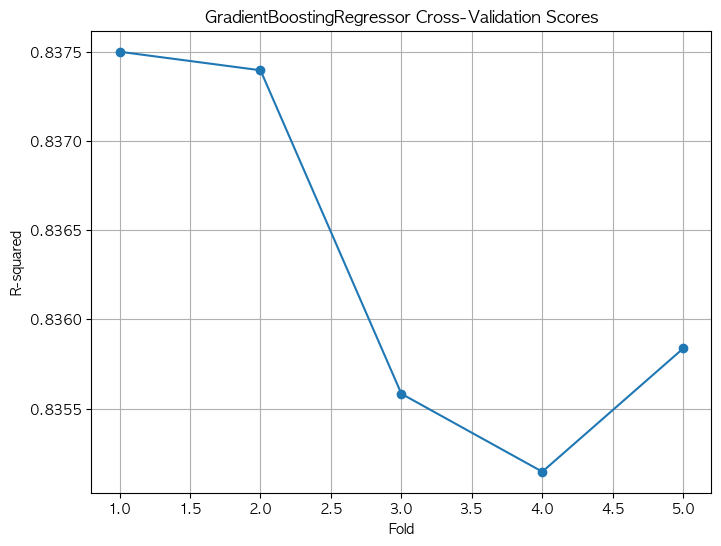

In [148]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(gb_scores) + 1), poly_scores, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('GradientBoostingRegressor Cross-Validation Scores')
plt.grid(True)
plt.show()

## 결과

In [154]:
import joblib

# 모델 불러오기
model = joblib.load("random_forest_model.pkl")

['random_forest_model.pkl']

In [ ]:
from gradio import Interface, components

# Gradio 인터페이스 설정
def predict_price(exclusive_use_area, year_of_completion, floor, park_min, kind_min, subway_min, elem_min):
    data = pd.DataFrame({
        'exclusive_use_area': [exclusive_use_area],
        'year_of_completion': [year_of_completion],
        'floor': [floor],
        'park_min': [park_min],
        'kind_min': [kind_min],
        'subway_min': [subway_min],
        'elem_min': [elem_min]
    })
    prediction = model.predict(data)[0]
    return f"{prediction} KRW"

# 입력 및 출력 요소 정의
inputs = [
    components.Number(label="Exclusive Use Area", type="float"),        # 면적
    components.Number(label="Year of Completion", type="int"),          # 설립일자
    components.Number(label="Floor", type="float"),                     # 층
    components.Number(label="Park Min", type="float"),                  # 공원 거리
    components.Number(label="Kind Min", type="float"),                  # 어린이집 거리
    components.Number(label="Subway Min", type="float"),                # 지하철 거리
    components.Number(label="Elem Min", type="float"),                  # 초등학교 거리
    components.Number(label="adjusted_year_of_completion", type="int")  # 연식
]

output = components.Textbox(label="Predicted Price")

# Gradio 인터페이스 실행
iface = Interface(fn=predict_price, inputs=inputs, outputs=output)
iface.launch()